# Lab 2: Image filtering

### Petko Petkov

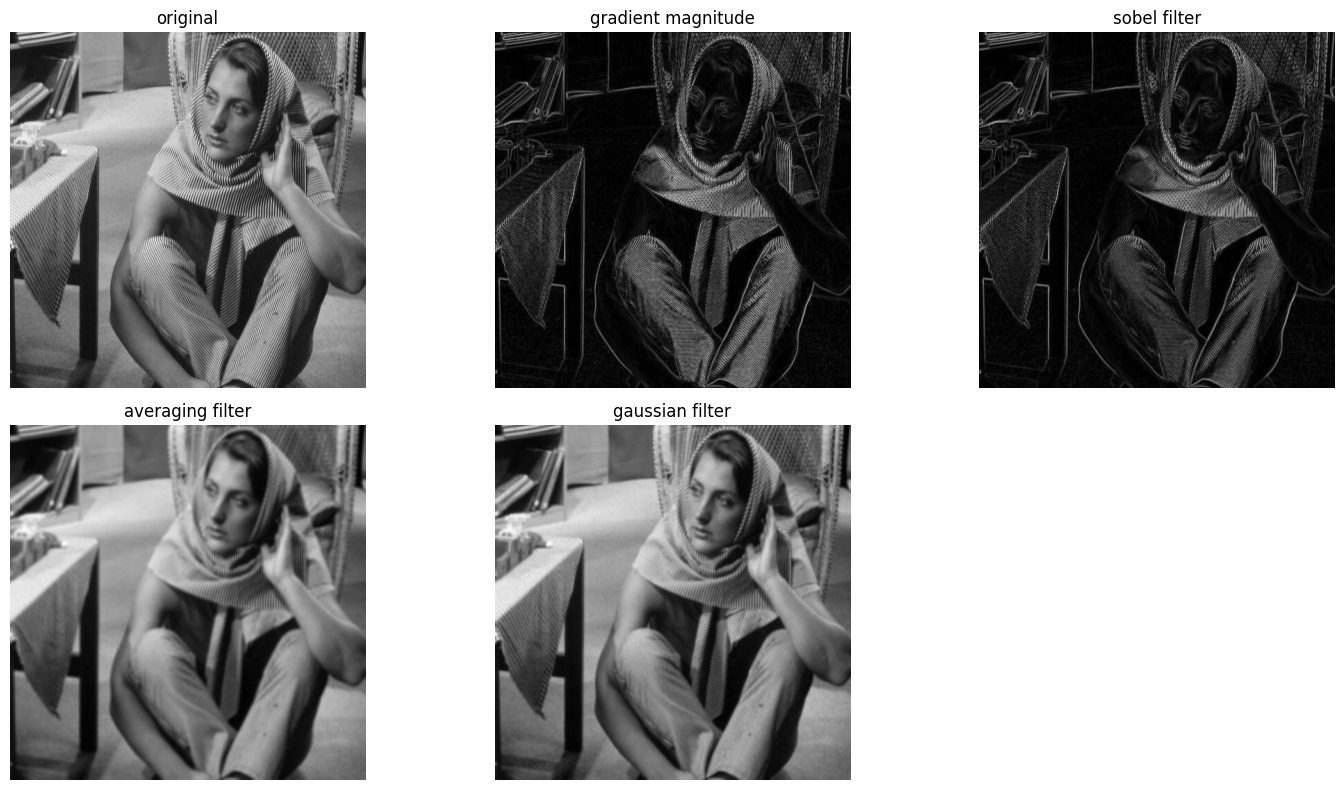

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../data/barbara.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("image file not found")

# gradient filter
kx = np.array([[-1, 0, 1]], dtype=np.float32) * 0.5
ky = kx.T
gx_cd = cv2.filter2D(image.astype(np.float32), -1, kx)
gy_cd = cv2.filter2D(image.astype(np.float32), -1, ky)
grad_mag_cd = cv2.magnitude(gx_cd, gy_cd)

# sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# averaging filter
kernel_size = 5
average = cv2.blur(image, (kernel_size, kernel_size))

# gaussian filter
gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX=1)

titles = ['original', 'gradient magnitude', 'sobel filter', 'averaging filter', 'gaussian filter']
images = [image, grad_mag_cd, sobel_combined, average, gaussian]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


**Gradient filter:** Computes first-order changes in x and y (I used central difference). It lights up edges and tiny textures. Also flat areas go dark. Very good at showing detail but also boosts noise, so the map can look grainy and edges are thin.

**Sobel filter:** A specific gradient with a little built-in smoothing across the edge. It gives similar edge strength but with slightly thicker, cleaner lines and less noise than a plain gradient.

**Averaging filter:** Replaces each pixel with the mean of a k×k window. Kills noise and fine texture but also softens edges and can make things look flat or smeared.

**Gaussian blur:** Also smooths, but weights nearby pixels more than far ones, so the blur looks more natural and causes fewer artifacts than a box blur. σ can be increased to blur more.

**Frequency view:** Gradients/Sobel are high-pass (boost edges + noise). Averaging/Gaussian are low-pass (suppress noise + fine detail).